In [63]:
from fastai.vision.all import *
from pathlib import Path

In [64]:
path = Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data')

In [65]:
((path/'train_images').ls())[1]

Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data/train_images/new_cola (10).jpg.jpg')

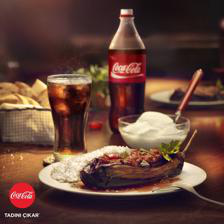

In [66]:
Image.open(((path/'train_images').ls())[10])

# Create dataloader

### We use regex to find photo's label

In [67]:
text = "new_cola (10).jpg"
re.findall(r'_(\w+)\s*\(', text)


['cola']

In [68]:
data_block = DataBlock(
                        blocks=(ImageBlock, CategoryBlock),

                        # We only use the train folder to create the dataset
                        get_items=get_image_files,

                        # We randomly split the train folder into two parts: training and validation
                        splitter=RandomSplitter(valid_pct=0.2, seed=42),

                        # We get the label from the file name
                        get_y=using_attr(RegexLabeller(r'_(\w+)\s*\('), 'name'),

                        item_tfms=Resize(460),
                        batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# we use summery to find error in dataloader
data_block.summary(path/'train_images')

Setting-up type transforms pipelines
Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying partial gives
      cola
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: part

In [69]:
#Give train dataset to dataloder
dls = data_block.dataloaders(path/'train_images')

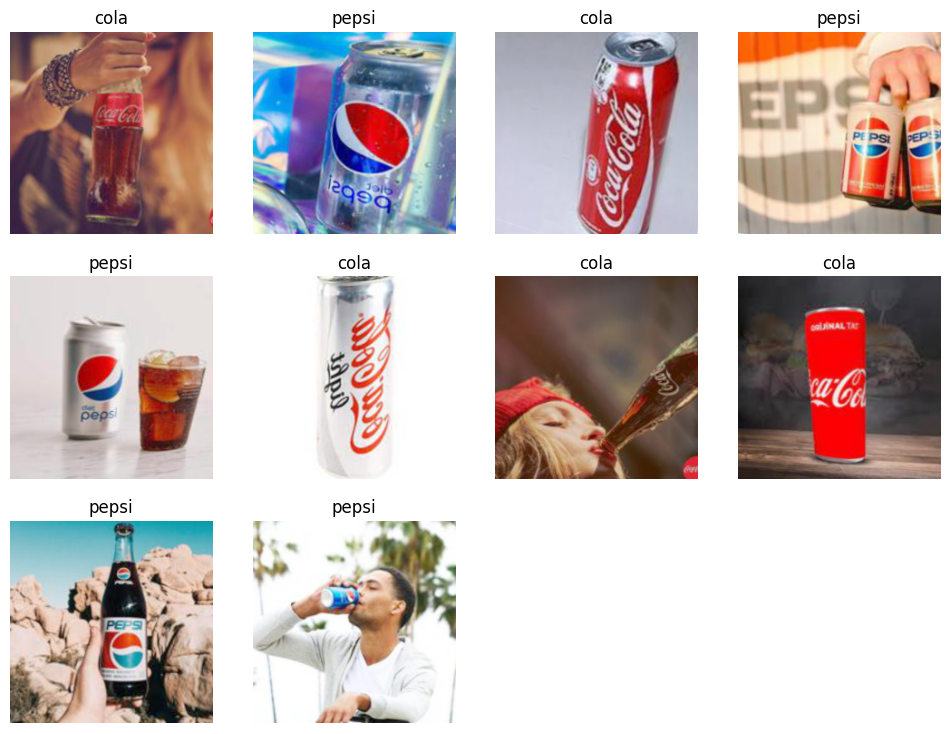

In [70]:
#check some photo's label
dls.show_batch(max_n = 10, nrows = 3)

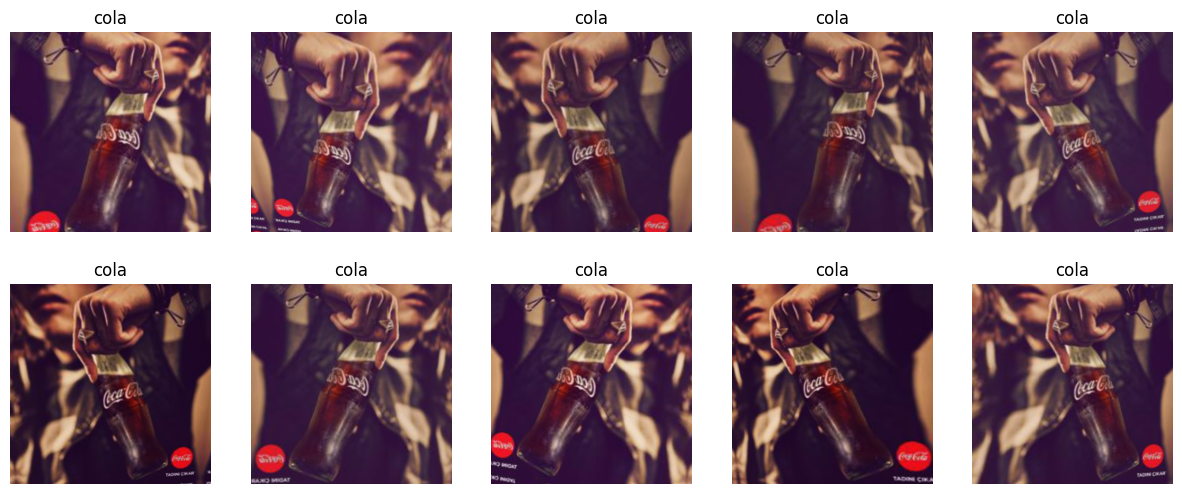

In [71]:
#Here, we used unique=True to have the same image repeated with different versions of this RandomResizedCrop transform.
dls.train.show_batch(max_n = 10, nrows = 2, unique = True)

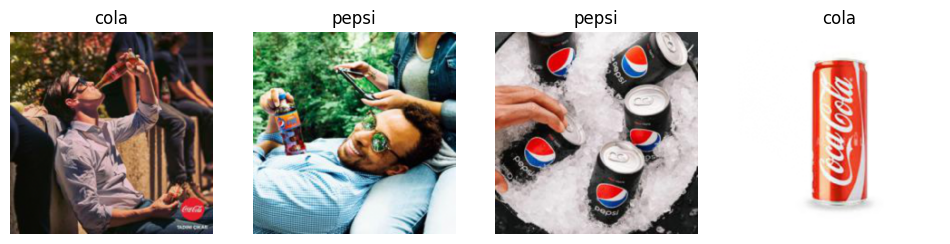

In [72]:
#Show some validation data
dls.valid.show_batch(max_n=4, nrows=1)

# Create Learner

### We use resnet34 as our transformer model

In [73]:
learner = vision_learner(dls , resnet34, metrics = error_rate)

In [74]:
x,y = dls.one_batch()

In [75]:
y

TensorCategory([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
                0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
                1])

In [76]:
preds = learner.get_preds(dl = [(x,y)])
preds[0]

tensor([[9.3602e-01, 6.3975e-02],
        [9.8632e-01, 1.3678e-02],
        [3.8248e-05, 9.9996e-01],
        [7.9386e-01, 2.0614e-01],
        [9.9267e-01, 7.3294e-03],
        [9.9985e-01, 1.5443e-04],
        [1.3477e-01, 8.6523e-01],
        [9.7218e-01, 2.7816e-02],
        [8.2365e-01, 1.7635e-01],
        [9.1351e-01, 8.6494e-02],
        [6.0521e-01, 3.9479e-01],
        [8.5938e-01, 1.4062e-01],
        [5.4357e-02, 9.4564e-01],
        [9.3108e-01, 6.8921e-02],
        [9.7933e-01, 2.0673e-02],
        [8.3129e-01, 1.6871e-01],
        [9.9040e-01, 9.6012e-03],
        [9.9802e-01, 1.9840e-03],
        [8.0115e-01, 1.9885e-01],
        [5.5446e-03, 9.9446e-01],
        [6.8265e-01, 3.1735e-01],
        [9.9984e-01, 1.6357e-04],
        [6.1664e-01, 3.8336e-01],
        [2.4901e-01, 7.5099e-01],
        [9.5070e-01, 4.9303e-02],
        [5.1700e-01, 4.8300e-01],
        [5.3587e-01, 4.6413e-01],
        [3.8413e-02, 9.6159e-01],
        [7.7776e-01, 2.2224e-01],
        [2.618

# Improving Our Model

### Find Optimom learning rate

In [77]:
print("fining best learning rate..")
suggested_lrs = learner.lr_find()

fining best learning rate..


KeyboardInterrupt: 

# Fine Tune

In [ ]:
learner.fine_tune(4, base_lr= 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.997665,0.441227,0.159574,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.557521,0.250072,0.085106,00:53
1,0.431515,0.149387,0.063830,00:53
2,0.326604,0.128439,0.053191,00:54
3,0.266117,0.123378,0.053191,00:54


### Model performance

-- plot confusion matrix ----



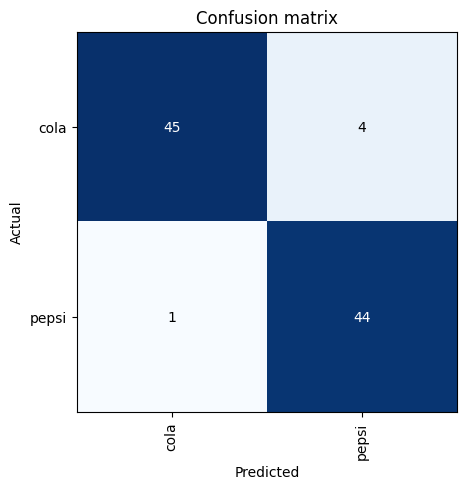

In [ ]:
Intrep = ClassificationInterpretation.from_learner(learner)
print('-- plot confusion matrix ----\n')
Intrep.plot_confusion_matrix()

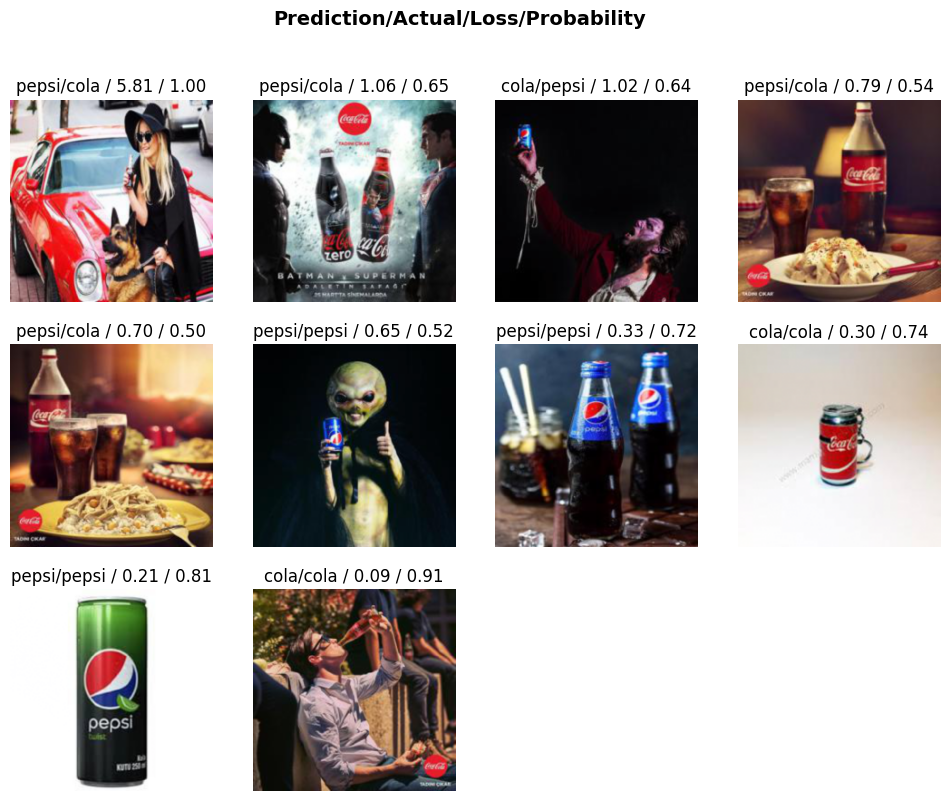

In [ ]:
Intrep.plot_top_losses(10)

# Clean our dataset

In [ ]:
from fastai.vision.widgets import ImageClassifierCleaner

# here we can delete or relabel our image in train and validation data
cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
#remove data from our dataset
for idx,cat in cleaner.change() : shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
#change photo's label in our data
for idx in cleaner.delete() :cleaner.fns[idx].unlink()

### We need to create dataloader and learner again.

In [ ]:
cleaned_dls = data_block.dataloaders((path/'train_images'))

In [ ]:
cleaned_learner = vision_learner(cleaned_dls , resnet34, metrics = error_rate)

fining best learning rate..


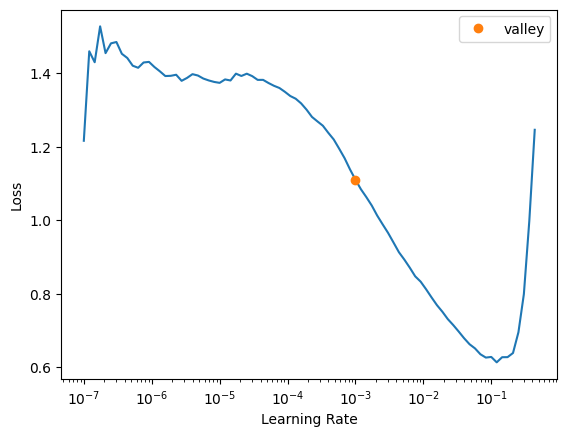

In [ ]:
print("fining best learning rate..")
suggested_lrs_clean = cleaned_learner.lr_find()

In [ ]:
cleaned_learner.fine_tune(4, base_lr= 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.027637,0.122323,0.031915,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.004574,0.119099,0.031915,00:54
1,0.005997,0.181808,0.074468,00:53
2,0.019662,0.106286,0.042553,00:53
3,0.022216,0.087557,0.042553,00:54


In [ ]:
cleaned_intrep = ClassificationInterpretation.from_learner(cleaned_learner)

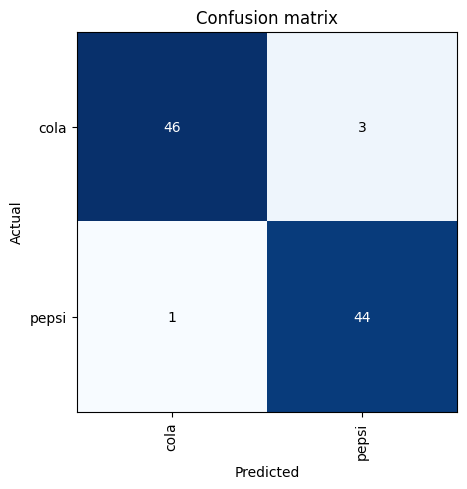

In [ ]:
cleaned_intrep.plot_confusion_matrix()

# Use Freezing and Unfreezing Concept

### 1.Train the model head (in Freeze mode) for 3 periods
#### We use a relatively high learning rate because only the last layers are trained

In [82]:
from fastai.callback.tracker import EarlyStoppingCallback, SaveModelCallback

new_learner = vision_learner(dls, resnet34, metrics=error_rate,
                        cbs=[
                        # This callback stops training
                        EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3),

                        # This callback saves the best model during training
                        SaveModelCallback(monitor='valid_loss')
                        ])

In [83]:
print("Step 1: Training the model head (Frozen)...")
new_learner.fit_one_cycle(3, 2e-3)

Step 1: Training the model head (Frozen)...


epoch,train_loss,valid_loss,error_rate,time
0,0.961795,0.234703,0.095745,00:31
1,0.629796,0.083698,0.042553,00:41
2,0.455725,0.072692,0.031915,00:40


Better model found at epoch 0 with valid_loss value: 0.2347031682729721.
Better model found at epoch 1 with valid_loss value: 0.08369765430688858.
Better model found at epoch 2 with valid_loss value: 0.07269195467233658.


### 2.Unfreeze all layers of the model

In [84]:
print("Unfreeze all layers...")
new_learner.unfreeze()

Unfreeze all layers...


### 3. Find the new learning rate for the entire model
#### The graph for this step will be different from the previous graph

SuggestedLRs(valley=7.585775892948732e-05)

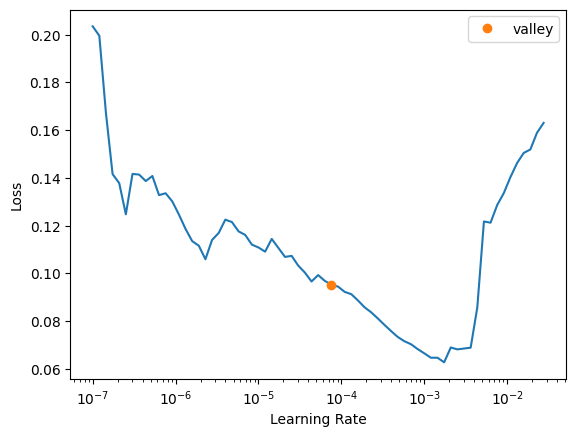

In [79]:
new_learner.lr_find()

### 4. Train the entire model with discrete learning rates

In [86]:

print("Step 2: Train the entire model (Unfrozen)...")
new_learner.fit_one_cycle(8, lr_max=slice(1e-6, 1e-4))

Step 2: Train the entire model (Unfrozen)...


epoch,train_loss,valid_loss,error_rate,time
0,0.177890,0.068221,0.031915,00:48
1,0.173273,0.066293,0.031915,00:53
2,0.131694,0.069405,0.031915,00:52
3,0.116801,0.073187,0.031915,00:53


Better model found at epoch 0 with valid_loss value: 0.06822147965431213.
Better model found at epoch 1 with valid_loss value: 0.06629300117492676.
No improvement since epoch 0: early stopping


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

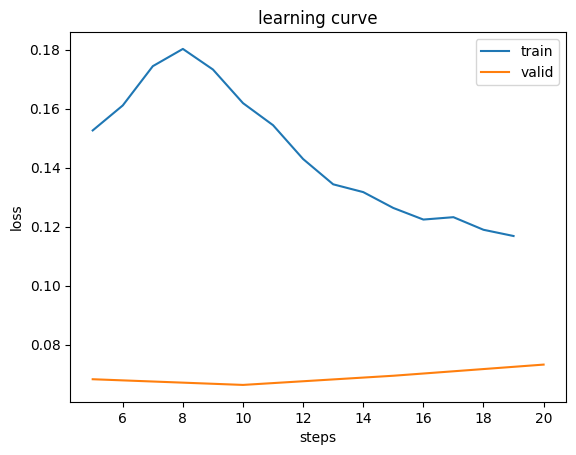

In [87]:
new_learner.recorder.plot_loss()

# Final evaluation on the Test Set

In [88]:
# 1. Specify the path to your test folder
# (make sure the folder name is correct, e.g. test_images or test)
path_to_test_images = path/'test_images'

# 2. Create a test dataloader. The tags are read from the file name.
test_files = get_image_files(path_to_test_images)
test_dl = dls.test_dl(test_files, with_labels=True)

### Compare between cleaned_learner and new_learner

In [89]:
# 3. Evaluate the final model with the test data
# We don't use the model we saved, but the cleaned_learner one that is in memory
# Because we want to evaluate the same model
print("Evaluating model on Test Set...")
results = cleaned_learner.validate(dl=test_dl)

# We print the final results
# Index 1 is for loss and index 2 is for error_rate
print(f"Final Loss on Test Set: {results[0]:.4f}")
print(f"Final Error Rate on Test Set: {results[1]:.4f}")
print(f"Final Accuracy on Test Set: {1 - results[1]:.4f}")

Evaluating model on Test Set...


Final Loss on Test Set: 0.1888
Final Error Rate on Test Set: 0.0870
Final Accuracy on Test Set: 0.9130


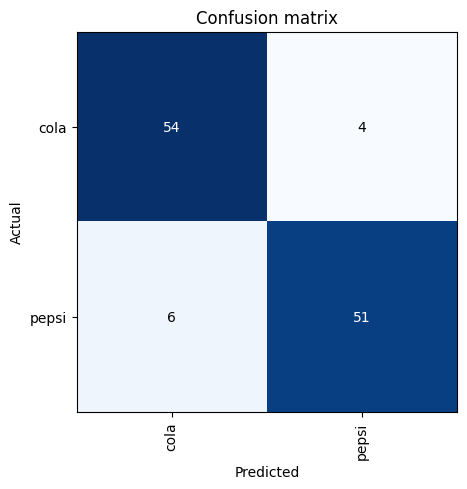

In [90]:
# 1. We create the Interpretation object this time using the test data
# We pass the test data loader (test_dl) to the dl parameter
interp_test = ClassificationInterpretation.from_learner(cleaned_learner, dl=test_dl)

# 2. Now we plot the confusion matrix for the test data
interp_test.plot_confusion_matrix()

In [91]:
# 3. Evaluate the final model with the test data
# We don't use the model we saved, but the cleaned_learner one that is in memory
# Because we want to evaluate the same model
print("Evaluating model on Test Set...")
results = new_learner.validate(dl=test_dl)

# We print the final results
# Index 1 is for loss and index 2 is for error_rate
print(f"Final Loss on Test Set: {results[0]:.4f}")
print(f"Final Error Rate on Test Set: {results[1]:.4f}")
print(f"Final Accuracy on Test Set: {1 - results[1]:.4f}")

Evaluating model on Test Set...


Better model found at epoch 0 with valid_loss value: 0.03478260710835457.
Final Loss on Test Set: 0.0528
Final Error Rate on Test Set: 0.0348
Final Accuracy on Test Set: 0.9652


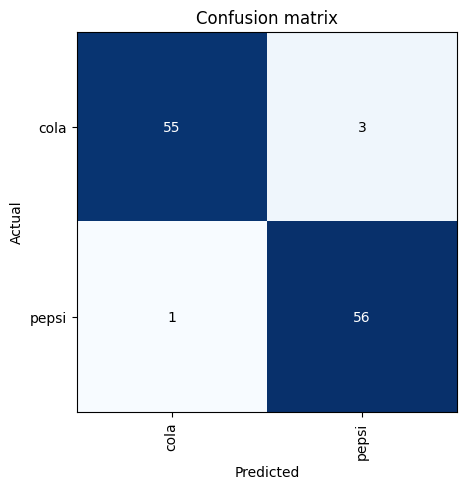

In [92]:
# 1. We create the Interpretation object this time using the test data
# We pass the test data loader (test_dl) to the dl parameter
interp_test = ClassificationInterpretation.from_learner(new_learner, dl=test_dl)

# 2. Now we plot the confusion matrix for the test data
interp_test.plot_confusion_matrix()